[View in Colaboratory](https://colab.research.google.com/github/AashiDutt/Deep_Learning/blob/master/Convolutional_Neural_Networks.ipynb)

# In this notebook we will learn about Tensor Math , 1D and 2D convolutions, Image Filtering with convolution and Pooling layers.

In [0]:
# Importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Tensor Math

In [0]:
# Tensor is a combination of matrices used to represent images into numeric form.

# Wikipedia describes Tensor as  a mathematical object analogous to but more general than a vector, represented by an array of components that are functions of the coordinates of a space

# Example [2,2,4] means 2 rows , 2 columns and depth = 4

In [0]:
# creating Tensors

A = np.random.randint(10, size =(2,3,4,5))  # order 4 tensor
B = np.random.randint(10, size =(2,3))      # order 2 tensor

In [4]:
A

# there are 2 objects in the outermost array
# then there are 3 objects in its inner array
# then 4 objects in its inner array
# then 5 objects in inner most array

array([[[[8, 5, 9, 2, 1],
         [3, 5, 9, 6, 2],
         [3, 4, 6, 5, 6],
         [9, 3, 6, 5, 8]],

        [[6, 4, 3, 3, 4],
         [7, 1, 5, 6, 4],
         [6, 3, 4, 5, 4],
         [2, 3, 7, 2, 7]],

        [[5, 7, 6, 1, 6],
         [9, 8, 6, 6, 1],
         [5, 4, 0, 9, 2],
         [9, 4, 9, 6, 5]]],


       [[[1, 2, 4, 5, 9],
         [9, 0, 0, 9, 7],
         [9, 4, 5, 8, 8],
         [9, 9, 9, 0, 0]],

        [[9, 0, 0, 9, 9],
         [7, 2, 2, 1, 5],
         [1, 1, 2, 1, 5],
         [3, 3, 8, 3, 1]],

        [[6, 6, 8, 2, 7],
         [5, 4, 6, 9, 6],
         [5, 1, 3, 1, 4],
         [9, 3, 6, 2, 2]]]])

In [5]:
A[0,1,0,3]

3

In [6]:
B

# its an order 2 Tensor so its a simple matrix

array([[3, 4, 9],
       [1, 0, 5]])

In [7]:
# creating a Random Colored Image
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img


array([[[230, 111, 111],
        [ 40,  30, 190],
        [ 51, 228, 153],
        [180,  34, 178]],

       [[ 38, 110, 191],
        [161, 178, 100],
        [113, 241, 206],
        [ 64,  66, 248]],

       [[139,  49,  19],
        [219, 243, 123],
        [197, 250, 143],
        [234, 183,  16]],

       [[ 44,  24,  68],
        [ 41, 133, 119],
        [150, 243, 242],
        [162, 182,  11]]], dtype=uint8)

Text(0.5,1,'Blue Channel')

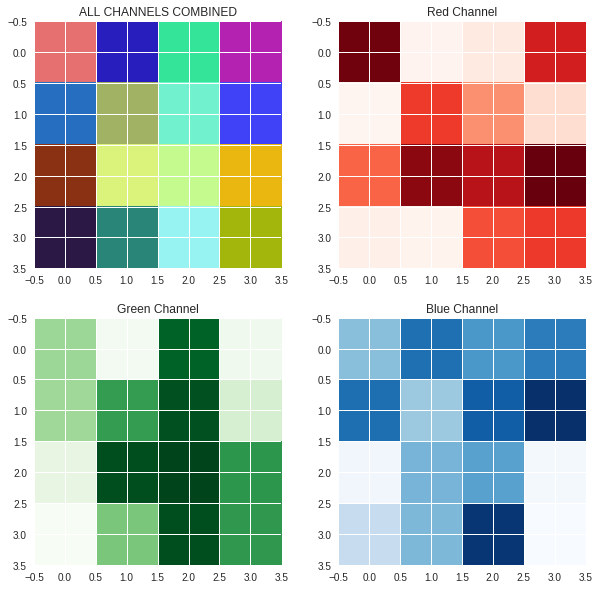

In [8]:
# plotting subplots and channels(Red ,Green, Blue)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img)
plt.title('ALL CHANNELS COMBINED')

plt.subplot(222)
plt.imshow(img[:, :, 0],cmap='Reds')
plt.title('Red Channel')

plt.subplot(223)
plt.imshow(img[:, :, 1],cmap='Greens')
plt.title('Green Channel')

plt.subplot(224)
plt.imshow(img[:, :, 2],cmap='Blues')
plt.title('Blue Channel')

In [9]:
# Tensor operations
2 * A

array([[[[16, 10, 18,  4,  2],
         [ 6, 10, 18, 12,  4],
         [ 6,  8, 12, 10, 12],
         [18,  6, 12, 10, 16]],

        [[12,  8,  6,  6,  8],
         [14,  2, 10, 12,  8],
         [12,  6,  8, 10,  8],
         [ 4,  6, 14,  4, 14]],

        [[10, 14, 12,  2, 12],
         [18, 16, 12, 12,  2],
         [10,  8,  0, 18,  4],
         [18,  8, 18, 12, 10]]],


       [[[ 2,  4,  8, 10, 18],
         [18,  0,  0, 18, 14],
         [18,  8, 10, 16, 16],
         [18, 18, 18,  0,  0]],

        [[18,  0,  0, 18, 18],
         [14,  4,  4,  2, 10],
         [ 2,  2,  4,  2, 10],
         [ 6,  6, 16,  6,  2]],

        [[12, 12, 16,  4, 14],
         [10,  8, 12, 18, 12],
         [10,  2,  6,  2,  8],
         [18,  6, 12,  4,  4]]]])

In [10]:
A +A

array([[[[16, 10, 18,  4,  2],
         [ 6, 10, 18, 12,  4],
         [ 6,  8, 12, 10, 12],
         [18,  6, 12, 10, 16]],

        [[12,  8,  6,  6,  8],
         [14,  2, 10, 12,  8],
         [12,  6,  8, 10,  8],
         [ 4,  6, 14,  4, 14]],

        [[10, 14, 12,  2, 12],
         [18, 16, 12, 12,  2],
         [10,  8,  0, 18,  4],
         [18,  8, 18, 12, 10]]],


       [[[ 2,  4,  8, 10, 18],
         [18,  0,  0, 18, 14],
         [18,  8, 10, 16, 16],
         [18, 18, 18,  0,  0]],

        [[18,  0,  0, 18, 18],
         [14,  4,  4,  2, 10],
         [ 2,  2,  4,  2, 10],
         [ 6,  6, 16,  6,  2]],

        [[12, 12, 16,  4, 14],
         [10,  8, 12, 18, 12],
         [10,  2,  6,  2,  8],
         [18,  6, 12,  4,  4]]]])

In [11]:
np.tensordot(A ,B,axes =([0,1],[0,1]))

# Dot product of Tensors by specifying the axes we want to dot.Since both A and B have 2 features in common.
# therefore we take dot product wrt those feature coordinates.

array([[124, 126, 137,  42, 117],
       [152, 111, 131, 150,  68],
       [112,  69,  54, 129,  80],
       [170,  81, 166,  87, 107]])

In [12]:
A.shape

(2, 3, 4, 5)

In [13]:
B.shape

(2, 3)

In [14]:
np.tensordot(A ,B,axes =([0],[0])).shape

(3, 4, 5, 3)

# 1D CONVOLUTION

In [0]:
a =np.array([0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],dtype='float32')


In [0]:
b = np.array([-1,1],dtype='float32')


In [0]:
c = np.convolve(a,b)

# convolution means taking samples of a and b and taking their consecutive products with each other and then summing them.

In [18]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

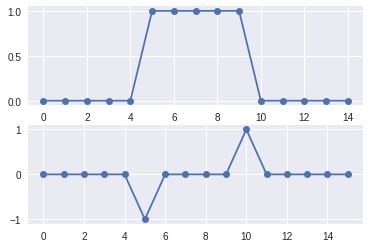

In [19]:
# plot of a
plt.subplot(211)
plt.plot(a, 'o-')

# plot of convolution of a and b i.e c
plt.subplot(212)
plt.plot(c,'o-')

# IMAGE FILTERS WITH CONVOLUTION

In [0]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [0]:
img = misc.ascent()

In [22]:
img.shape

(512, 512)

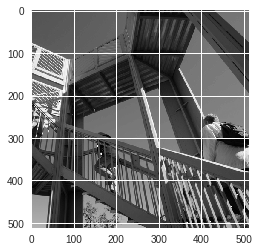

In [23]:
plt.imshow(img,cmap='gray')

In [0]:
# convoluting above image with below given kernel

h_kernel = np.array([[1,2,1],
                     [0,0,0],
                     [-1,-2,-1]])


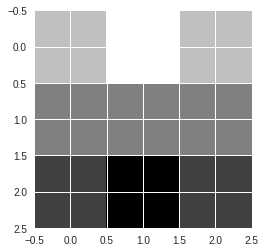

In [25]:
plt.imshow(h_kernel,cmap='gray')

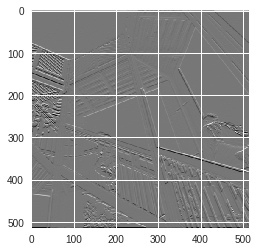

In [26]:
res = convolve2d(img, h_kernel)
plt.imshow(res, cmap='gray')

In [0]:
# we see that on convoluting the horizontal lines became more prominent(it has highlighted horizontal contrast lines)

# CONVOLUTIONAL NEURAL NETWORK


In [28]:
from keras.layers import Conv2D

Using TensorFlow backend.


In [29]:
img.shape

(512, 512)

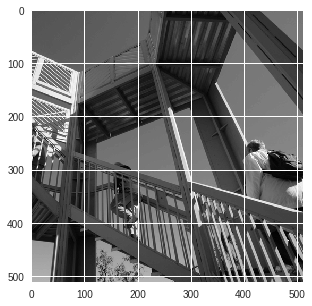

In [30]:
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')

In [0]:
# reshaping image

img_tensor = img.reshape((1,512,512,1)) # (1 sample, 512 pixels of height,512 pixels of weight,1 color channel)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K


In [0]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [0]:
# performing Convolution
img_pred_tensor = model.predict(img_tensor)

In [35]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [0]:
img_pred = img_pred_tensor[0, : ,: ,0] # getting inner components

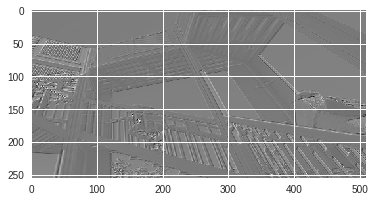

In [37]:
plt.imshow(img_pred , cmap = 'gray')

In [0]:
# plotting weights

weights = model.get_weights()

In [39]:
weights[0].shape

# (height ,weight , 1 channel i/p , 1 channel o/p)

(3, 3, 1, 1)

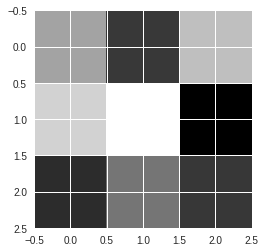

In [40]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray') # displaying first 2 components

In [0]:
# Creating a All Ones Filter


In [0]:
weights[0] = np.ones(weights[0].shape)

In [0]:
model.set_weights(weights)

In [0]:
# Recalculate image Tensor
img_pred_tensor = model.predict(img_tensor)

In [0]:
img_pred  = img_pred_tensor[0, :, :, 0]

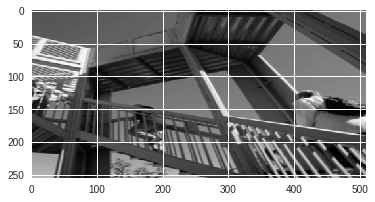

In [45]:
plt.imshow(img_pred, cmap='gray')

In [46]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)


img_pred_tensor.shape


(1, 512, 512, 1)

# POOLING LAYERS

# A Pooling Operation reduces the size of image by discarding some information.

**Max Pooling ** discards the small values and keeps the maximum value and stores it in a new image.

# it also reduces size of image.

** Average Pooling** keeps only the average value and stores it in a new image preserving the information about the locations of good matches.


In [0]:
from keras.layers import MaxPool2D,AvgPool2D

In [0]:
# MAXIMUM POOLING

model=Sequential()
model.add(MaxPool2D((5,5),input_shape=(512,512,1))) # we reduced image size by factor of 5
model.compile('adam','mse')

In [0]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

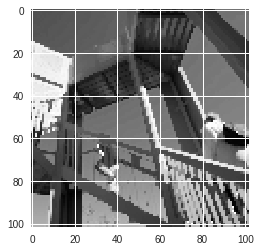

In [51]:
plt.imshow(img_pred, cmap='gray')

# granuality of each pixel has changed because we have used maximum values

In [0]:
# AVERAGE POOLING

model=Sequential()
model.add(AvgPool2D((5,5),input_shape=(512,512,1))) # we reduced image size by factor of 5
model.compile('adam','mse')

In [0]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

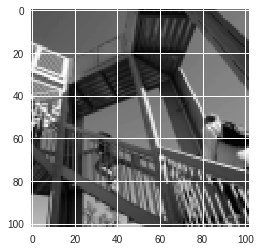

In [54]:
plt.imshow(img_pred, cmap='gray')

# BUILDING A CONVOLUTIONAL NEURAL NETWORK


In [0]:
from keras.datasets import mnist

In [56]:
(X_train ,y_train) , (X_test, y_test) = mnist.load_data('mnist.npz')

11493376/11490434 [==============================] - 10s 1us/step


In [0]:
X_train =X_train.reshape(-1,28,28,1) # reshape data so it looks like a tensor


In [58]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [0]:
from keras.layers import Flatten, Activation

In [0]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [63]:
model.summary()

# maxpooling decreases the size of image to half (26 , 26,32) ---> (13, 13 ,32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 26s 612us/step - loss: 14.5131 - acc: 0.0994 - val_loss: 14.5618 - val_acc: 0.0966
Epoch 2/2
22912/42000 [===============>..............] - ETA: 10s - loss: 14.5226 - acc: 0.0990

42000/42000 [==============================] - 26s 614us/step - loss: 14.5140 - acc: 0.0995 - val_loss: 14.5618 - val_acc: 0.0966


In [65]:
model.evaluate(X_test, y_test_cat)

ValueError: ignored